In [31]:
import nltk
from nltk.corpus import gutenberg
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import sent_tokenize

In [32]:
words = gutenberg.words('milton-paradise.txt')

In [33]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
word_counts = Counter(lemmatized_words)

top_words = word_counts.most_common(20)

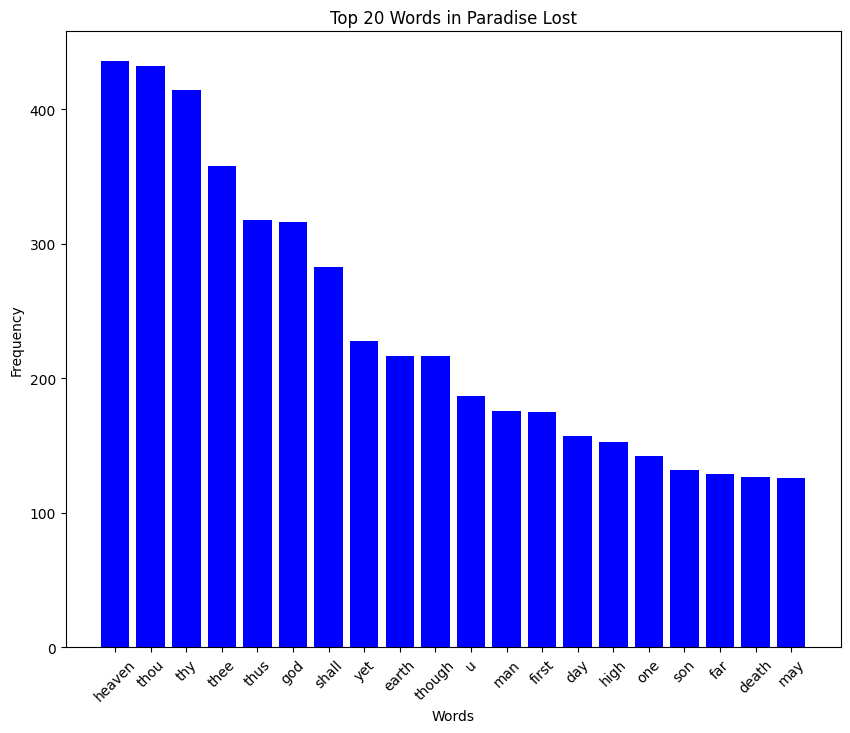

In [34]:
plt.figure(figsize=(10, 8))
plt.bar([word[0] for word in top_words], [word[1] for word in top_words], color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in Paradise Lost')
plt.xticks(rotation=45)
plt.show()

Question2.	Perform Vader Sentiment Analysis on the book.

In [35]:
text = gutenberg.raw('milton-paradise.txt')

sentences = sent_tokenize(text)

sia = SentimentIntensityAnalyzer()

sentiment_scores = [(sentence, sia.polarity_scores(sentence)) for sentence in sentences]

sentiment_scores.sort(key=lambda x: x[1]['compound'])

most_negative = sentiment_scores[:5]

most_positive = sentiment_scores[-5:]

most_neutral = sorted(sentiment_scores, key=lambda x: abs(x[1]['compound']))[:5]

print("Most Negative Sentences:")
for sentence in most_negative:
    print(sentence)

print("\nMost Positive Sentences:")
for sentence in most_positive:
    print(sentence)

print("\nMost Neutral Sentences:")
for sentence in most_neutral:
    print(sentence)

Most Negative Sentences:
("For this he shall live hated, be blasphemed, \nSeised on by force, judged, and to death condemned \nA shameful and accursed, nailed to the cross \nBy his own nation; slain for bringing life: \nBut to the cross he nails thy enemies, \nThe law that is against thee, and the sins \nOf all mankind, with him there crucified, \nNever to hurt them more who rightly trust \nIn this his satisfaction; so he dies, \nBut soon revives; Death over him no power \nShall long usurp; ere the third dawning light \nReturn, the stars of morn shall see him rise \nOut of his grave, fresh as the dawning light, \nThy ransom paid, which Man from death redeems, \nHis death for Man, as many as offered life \nNeglect not, and the benefit embrace \nBy faith not void of works:  This God-like act \nAnnuls thy doom, the death thou shouldest have died, \nIn sin for ever lost from life; this act \nShall bruise the head of Satan, crush his strength, \nDefeating Sin and Death, his two main arms; \

Question3.	Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not.

    Most Negative Sentences: Vader observed that there were many words like “hated,” “blasphemed,” “death” and “Satan” which had negative connotations. Instead, such sentiments can also go beyond being purely negative in a literary context as they may have deeper meanings reflecting the themes of sacrifice, redemption and divine justice which Vader might not capture.

    Most Positive Sentences: In the most positive sentences, words such as "glorious," "warm," and "sweetness" are used which are usually associated with positive feelings. Vader rightly notices these as affirmative; however, these quotations loss in sentiment scoring might be too simplistic regarding their larger literary context which could involve divine or existential themes.

    Most Neutral Sentences: This makes it easier for Vader to identify neutral sentences because they often do not contain strong sentiment words. However, even short phrases in a work like "Paradise Lost" can be loaded with significance or imply emotional undertones based on their context in the narrative.

Though Vader’s scores for sentiment helped identify some words with sentiment, it does not mean they match the overall emotion and theme of the sentence each time. The main limitation is that Vader was mainly designed to deal with straight forward text in modern parlance and not rich metaphorical literature thus while it is good tool for preliminary analysis it lacks nuance to fully interpret complex emotional and thematic layers of literary texts.

Question4. create a word cloud for your results from question 1 

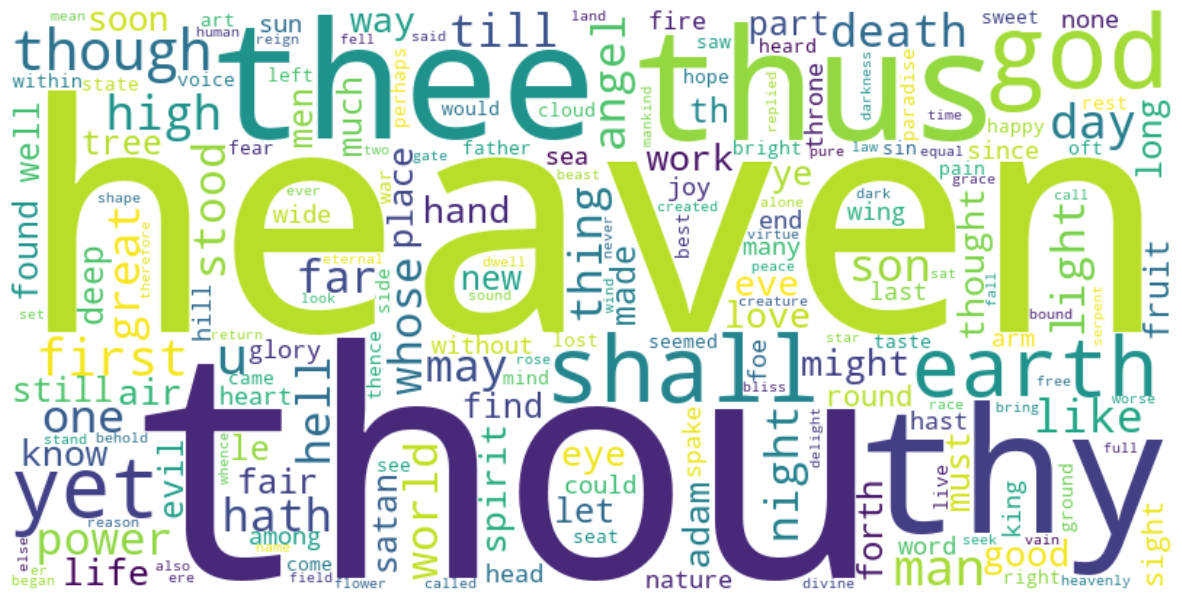

In [36]:
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()